In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from tslearn.clustering import TimeSeriesKMeans
from sklearn.decomposition import PCA
from tslearn.clustering import silhouette_score
from tslearn import metrics 
from scipy.cluster import hierarchy  # for performing hierarchical clustering
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('cases_deaths.csv')                                                              
data

,country,country_code,continent,population,indicator,daily_count,date,rate_14_day,source
0,Afghanistan,AFG,Asia,38928341,confirmed cases,0,2020-01-02,NaN,"Epidemic intelligence, national daily data"
1,Afghanistan,AFG,Asia,38928341,confirmed cases,0,2020-01-03,NaN,"Epidemic intelligence, national daily data"
2,Afghanistan,AFG,Asia,38928341,confirmed cases,0,2020-01-04,NaN,"Epidemic intelligence, national daily data"
3,Afghanistan,AFG,Asia,38928341,confirmed cases,0,2020-01-05,NaN,"Epidemic intelligence, national daily data"
4,Afghanistan,AFG,Asia,38928341,confirmed cases,0,2020-01-06,NaN,"Epidemic intelligence, national daily data"
...,...,...,...,...,...,...,...,...,...
129265,Zimbabwe,ZWE,Africa,14862927,deaths,1,2020-10-21,0.269126,"Epidemic intelligence, national daily data"
129266,Zimbabwe,ZWE,Africa,14862927,deaths,3,2020-10-22,0.470970,"Epidemic intelligence, national daily data"
129267,Zimbabwe,ZWE,Africa,14862927,deaths,0,2020-10-23,0.470970,"Epidemic intelligence, national daily data"
129268,Zimbabwe,ZWE,Africa,14862927,deaths,0,2020-10-24,0.470970,"Epidemic intelligence, national daily data"


In [3]:
data.describe(include="all")

,country,country_code,continent,population,indicator,daily_count,date,rate_14_day,source
count,129270,125756,129270,1.292700e+05,129270,129270.000000,129270,123628.000000,129270
unique,217,211,5,NaN,2,NaN,298,NaN,1
top,Afghanistan,AFG,Europe,NaN,confirmed cases,NaN,2020-05-30,NaN,"Epidemic intelligence, national daily data"
freq,596,596,33910,NaN,64635,NaN,434,NaN,129270
mean,NaN,NaN,NaN,7.360130e+07,NaN,727.430665,NaN,20.312661,NaN
std,NaN,NaN,NaN,3.553777e+08,NaN,6528.424273,NaN,65.530546,NaN
min,NaN,NaN,NaN,8.090000e+02,NaN,0.000000,NaN,0.000000,NaN
25%,NaN,NaN,NaN,9.880020e+05,NaN,0.000000,NaN,0.000000,NaN
50%,NaN,NaN,NaN,7.132530e+06,NaN,0.000000,NaN,0.691711,NaN
75%,NaN,NaN,NaN,2.913681e+07,NaN,18.000000,NaN,10.068930,NaN


In [4]:
data.isnull().sum()

country            0
country_code    3514
continent          0
population         0
indicator          0
daily_count        0
date               0
rate_14_day     5642
source             0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120270 entries, 13 to 129269
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   country       120270 non-null  object 
 1   country_code  120270 non-null  object 
 2   continent     120270 non-null  object 
 3   population    120270 non-null  int64  
 4   indicator     120270 non-null  object 
 5   daily_count   120270 non-null  int64  
 6   date          120270 non-null  object 
 7   rate_14_day   120270 non-null  float64
 8   source        120270 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 9.2+ MB


In [7]:
data['date']=pd.to_datetime(data['date'])

In [8]:
data

,country,country_code,continent,population,indicator,daily_count,date,rate_14_day,source
13,Afghanistan,AFG,Asia,38928341,confirmed cases,0,2020-01-15,0.000000,"Epidemic intelligence, national daily data"
14,Afghanistan,AFG,Asia,38928341,confirmed cases,0,2020-01-16,0.000000,"Epidemic intelligence, national daily data"
15,Afghanistan,AFG,Asia,38928341,confirmed cases,0,2020-01-17,0.000000,"Epidemic intelligence, national daily data"
16,Afghanistan,AFG,Asia,38928341,confirmed cases,0,2020-01-18,0.000000,"Epidemic intelligence, national daily data"
17,Afghanistan,AFG,Asia,38928341,confirmed cases,0,2020-01-19,0.000000,"Epidemic intelligence, national daily data"
...,...,...,...,...,...,...,...,...,...
129265,Zimbabwe,ZWE,Africa,14862927,deaths,1,2020-10-21,0.269126,"Epidemic intelligence, national daily data"
129266,Zimbabwe,ZWE,Africa,14862927,deaths,3,2020-10-22,0.470970,"Epidemic intelligence, national daily data"
129267,Zimbabwe,ZWE,Africa,14862927,deaths,0,2020-10-23,0.470970,"Epidemic intelligence, national daily data"
129268,Zimbabwe,ZWE,Africa,14862927,deaths,0,2020-10-24,0.470970,"Epidemic intelligence, national daily data"


In [9]:
data[data['daily_count']<= 0]

,country,country_code,continent,population,indicator,daily_count,date,rate_14_day,source
13,Afghanistan,AFG,Asia,38928341,confirmed cases,0,2020-01-15,0.000000,"Epidemic intelligence, national daily data"
14,Afghanistan,AFG,Asia,38928341,confirmed cases,0,2020-01-16,0.000000,"Epidemic intelligence, national daily data"
15,Afghanistan,AFG,Asia,38928341,confirmed cases,0,2020-01-17,0.000000,"Epidemic intelligence, national daily data"
16,Afghanistan,AFG,Asia,38928341,confirmed cases,0,2020-01-18,0.000000,"Epidemic intelligence, national daily data"
17,Afghanistan,AFG,Asia,38928341,confirmed cases,0,2020-01-19,0.000000,"Epidemic intelligence, national daily data"
...,...,...,...,...,...,...,...,...,...
129262,Zimbabwe,ZWE,Africa,14862927,deaths,0,2020-10-18,0.201844,"Epidemic intelligence, national daily data"
129263,Zimbabwe,ZWE,Africa,14862927,deaths,0,2020-10-19,0.201844,"Epidemic intelligence, national daily data"
129267,Zimbabwe,ZWE,Africa,14862927,deaths,0,2020-10-23,0.470970,"Epidemic intelligence, national daily data"
129268,Zimbabwe,ZWE,Africa,14862927,deaths,0,2020-10-24,0.470970,"Epidemic intelligence, national daily data"


In [10]:
data[data['rate_14_day']<= 0]  

,country,country_code,continent,population,indicator,daily_count,date,rate_14_day,source
13,Afghanistan,AFG,Asia,38928341,confirmed cases,0,2020-01-15,0.0,"Epidemic intelligence, national daily data"
14,Afghanistan,AFG,Asia,38928341,confirmed cases,0,2020-01-16,0.0,"Epidemic intelligence, national daily data"
15,Afghanistan,AFG,Asia,38928341,confirmed cases,0,2020-01-17,0.0,"Epidemic intelligence, national daily data"
16,Afghanistan,AFG,Asia,38928341,confirmed cases,0,2020-01-18,0.0,"Epidemic intelligence, national daily data"
17,Afghanistan,AFG,Asia,38928341,confirmed cases,0,2020-01-19,0.0,"Epidemic intelligence, national daily data"
...,...,...,...,...,...,...,...,...,...
129138,Zimbabwe,ZWE,Africa,14862927,deaths,0,2020-06-16,0.0,"Epidemic intelligence, national daily data"
129139,Zimbabwe,ZWE,Africa,14862927,deaths,0,2020-06-17,0.0,"Epidemic intelligence, national daily data"
129140,Zimbabwe,ZWE,Africa,14862927,deaths,0,2020-06-18,0.0,"Epidemic intelligence, national daily data"
129141,Zimbabwe,ZWE,Africa,14862927,deaths,0,2020-06-19,0.0,"Epidemic intelligence, national daily data"


In [11]:
data['daily_count'] = data['daily_count'].abs()

In [12]:
data['rate_14_day'] = data['rate_14_day'].abs()

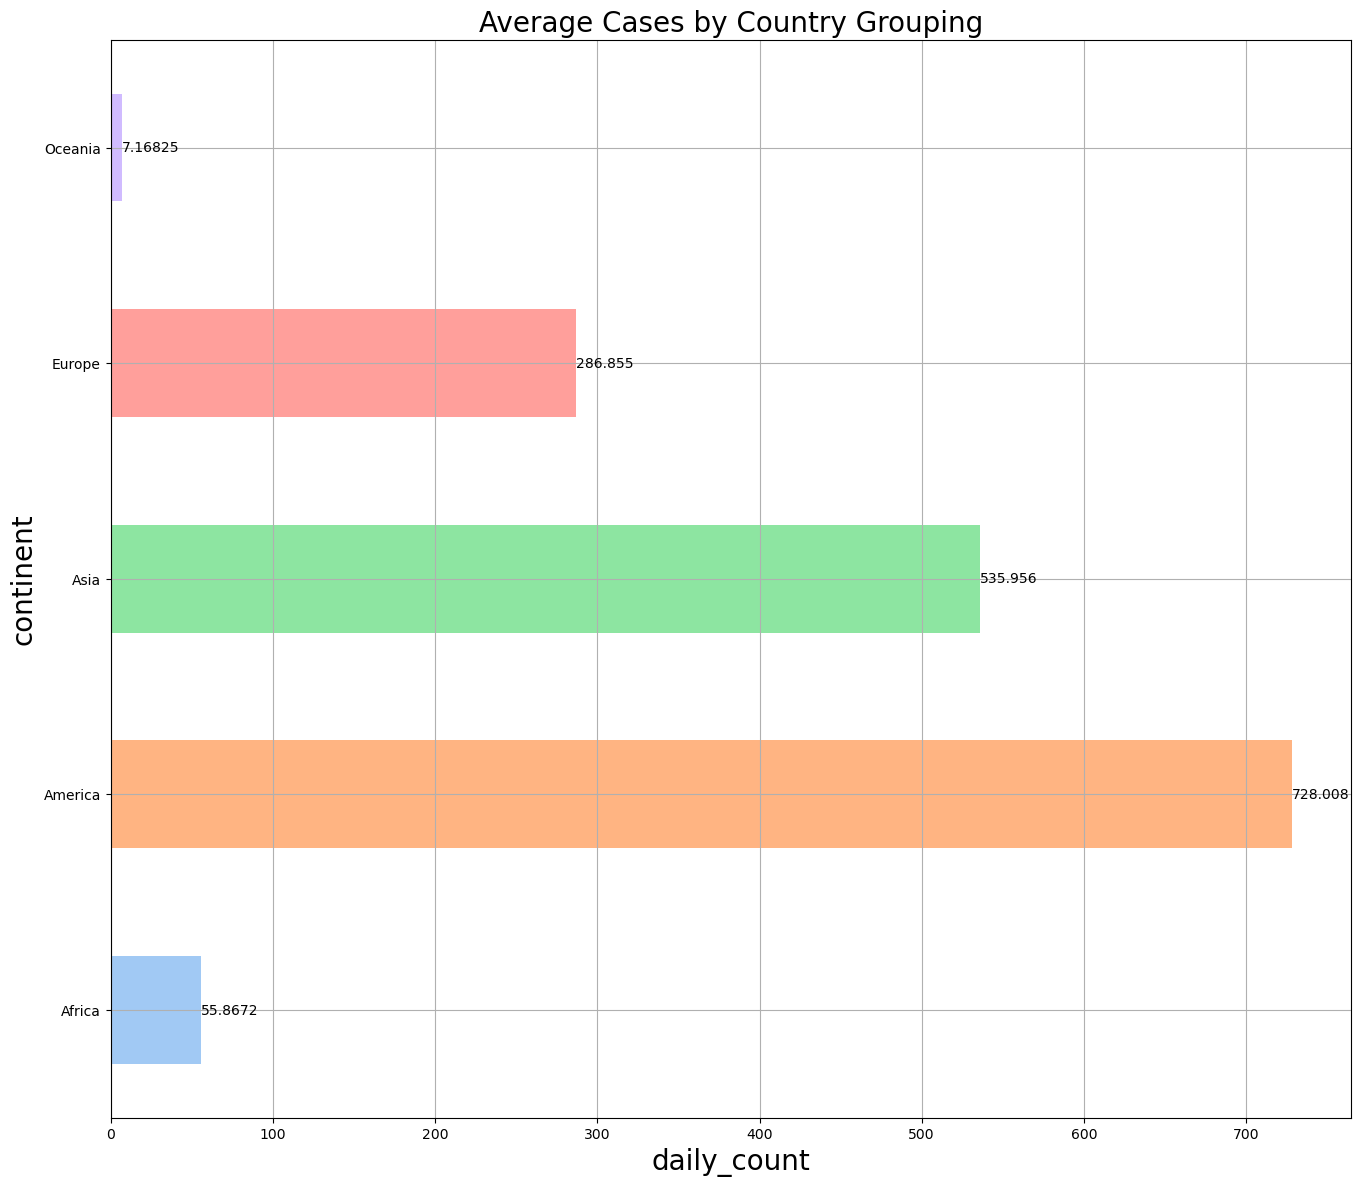

In [13]:
plt.figure(figsize=(16,14))
colors=sns.color_palette('pastel')
ax=data.groupby("continent")['daily_count'].mean().plot(kind='barh',color=colors[:8])
for cont in ax.containers:
    ax.bar_label(cont)
    
plt.xlabel("daily_count",fontsize=20)
plt.ylabel("continent",fontsize=20)
plt.title("Average Cases by Country Grouping",fontsize=20)
plt.grid()
#plt.legend(loc='upper left')
plt.show()

In [14]:
month = data.copy()

In [15]:
month = month.sort_values(by=['date']).set_index('date')
month.head(5)

,country,country_code,continent,population,indicator,daily_count,rate_14_day,source
date,,,,,,,,
2020-01-15,Afghanistan,AFG,Asia,38928341,confirmed cases,0,0.0,"Epidemic intelligence, national daily data"
2020-01-15,Saint Lucia,LCA,America,183629,deaths,0,0.0,"Epidemic intelligence, national daily data"
2020-01-15,Saint Lucia,LCA,America,183629,confirmed cases,0,0.0,"Epidemic intelligence, national daily data"
2020-01-15,Saint Kitts and Nevis,KNA,America,53192,deaths,0,0.0,"Epidemic intelligence, national daily data"
2020-01-15,Belgium,BEL,Europe,11455519,deaths,0,0.0,"Epidemic intelligence, national daily data"


In [16]:
month_3 = month.loc['2020-01':'2020-03']
month_3

,country,country_code,continent,population,indicator,daily_count,rate_14_day,source
date,,,,,,,,
2020-01-15,Afghanistan,AFG,Asia,38928341,confirmed cases,0,0.000000,"Epidemic intelligence, national daily data"
2020-01-15,Saint Lucia,LCA,America,183629,deaths,0,0.000000,"Epidemic intelligence, national daily data"
2020-01-15,Saint Lucia,LCA,America,183629,confirmed cases,0,0.000000,"Epidemic intelligence, national daily data"
2020-01-15,Saint Kitts and Nevis,KNA,America,53192,deaths,0,0.000000,"Epidemic intelligence, national daily data"
2020-01-15,Belgium,BEL,Europe,11455519,deaths,0,0.000000,"Epidemic intelligence, national daily data"
...,...,...,...,...,...,...,...,...
2020-03-31,Comoros,COM,Africa,869595,deaths,0,0.000000,"Epidemic intelligence, national daily data"
2020-03-31,Georgia,GEO,Europe,3989175,confirmed cases,8,1.629410,"Epidemic intelligence, national daily data"
2020-03-31,Bosnia and Herzegovina,BIH,Europe,3280815,deaths,2,2.438419,"Epidemic intelligence, national daily data"


In [17]:
month_countries = month_3['continent'].tolist()
month_countries

['Asia',
 'America',
 'America',
 'America',
 'Europe',
 'America',
 'Africa',
 'America',
 'Africa',
 'Europe',
 'Europe',
 'Europe',
 'America',
 'Europe',
 'Asia',
 'Africa',
 'Asia',
 'America',
 'America',
 'Africa',
 'Europe',
 'Europe',
 'Europe',
 'Europe',
 'America',
 'America',
 'Europe',
 'America',
 'Asia',
 'Asia',
 'Asia',
 'Africa',
 'Africa',
 'Asia',
 'Africa',
 'Africa',
 'Europe',
 'America',
 'America',
 'Africa',
 'America',
 'Africa',
 'Asia',
 'Asia',
 'Europe',
 'Africa',
 'Africa',
 'Europe',
 'Europe',
 'Europe',
 'America',
 'Europe',
 'America',
 'Europe',
 'Europe',
 'Europe',
 'Africa',
 'Africa',
 'Europe',
 'Africa',
 'Africa',
 'America',
 'Africa',
 'Oceania',
 'America',
 'Africa',
 'Oceania',
 'Oceania',
 'Oceania',
 'America',
 'Europe',
 'Europe',
 'Asia',
 'America',
 'Asia',
 'Oceania',
 'Asia',
 'Oceania',
 'Africa',
 'Asia',
 'America',
 'America',
 'Asia',
 'America',
 'America',
 'Oceania',
 'Asia',
 'Oceania',
 'America',
 'America',
 'Amer

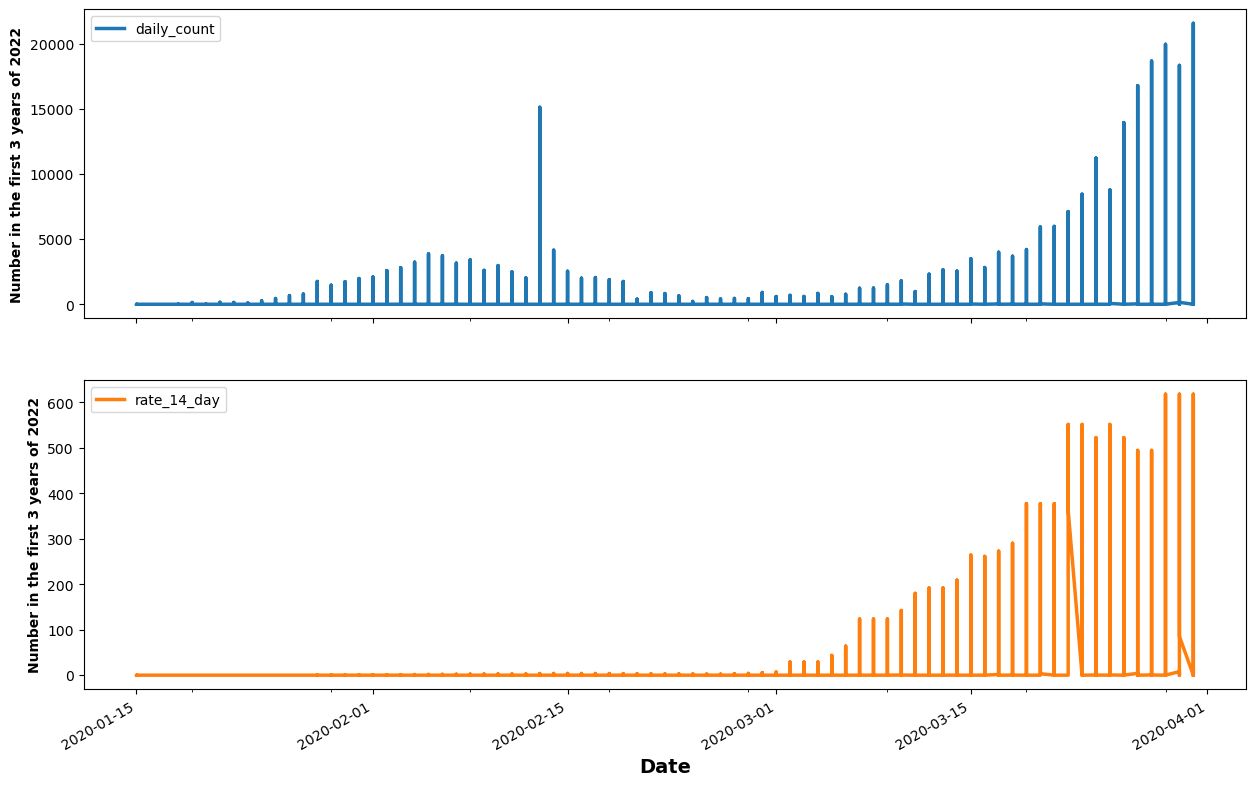

In [18]:
cols_month=['daily_count','rate_14_day']
axes = month_3[cols_month].plot(linewidth=2.5,figsize=(15,10),subplots=True)

for ax in axes:
    ax.set_xlabel('Date',fontsize=14,fontweight='bold')
    ax.set_ylabel('Number in the first 3 years of 2022',fontsize=10,fontweight='bold')

In [19]:
pivot1=pd.pivot_table(data=month_3, columns='continent',values='daily_count',index='date')
pivot1

continent,Africa,America,Asia,Europe,Oceania
date,,,,,
2020-01-15,0.000000,0.000000,0.023810,0.000000,0.00
2020-01-16,0.000000,0.000000,0.000000,0.000000,0.00
2020-01-17,0.000000,0.000000,0.059524,0.000000,0.00
2020-01-18,0.000000,0.000000,0.202381,0.000000,0.00
2020-01-19,0.000000,0.000000,1.630952,0.000000,0.00
...,...,...,...,...,...
2020-03-27,5.454545,196.408163,51.654762,357.027273,23.15
2020-03-28,4.954545,221.193878,60.357143,373.572727,14.60
2020-03-29,3.100000,234.826531,69.107143,334.400000,25.05


In [20]:
pivot1.isnull().sum()

continent
Africa     0
America    0
Asia       0
Europe     0
Oceania    0
dtype: int64

In [21]:
pivot1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 2020-01-15 to 2020-03-31
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Africa   77 non-null     float64
 1   America  77 non-null     float64
 2   Asia     77 non-null     float64
 3   Europe   77 non-null     float64
 4   Oceania  77 non-null     float64
dtypes: float64(5)
memory usage: 3.6 KB


In [22]:
pivot1 = pivot1.fillna(0)
pivot1

continent,Africa,America,Asia,Europe,Oceania
date,,,,,
2020-01-15,0.000000,0.000000,0.023810,0.000000,0.00
2020-01-16,0.000000,0.000000,0.000000,0.000000,0.00
2020-01-17,0.000000,0.000000,0.059524,0.000000,0.00
2020-01-18,0.000000,0.000000,0.202381,0.000000,0.00
2020-01-19,0.000000,0.000000,1.630952,0.000000,0.00
...,...,...,...,...,...
2020-03-27,5.454545,196.408163,51.654762,357.027273,23.15
2020-03-28,4.954545,221.193878,60.357143,373.572727,14.60
2020-03-29,3.100000,234.826531,69.107143,334.400000,25.05


In [23]:
pivot1.isnull().sum()

continent
Africa     0
America    0
Asia       0
Europe     0
Oceania    0
dtype: int64

In [24]:
countries = pivot1.columns.tolist()
countries

['Africa', 'America', 'Asia', 'Europe', 'Oceania']

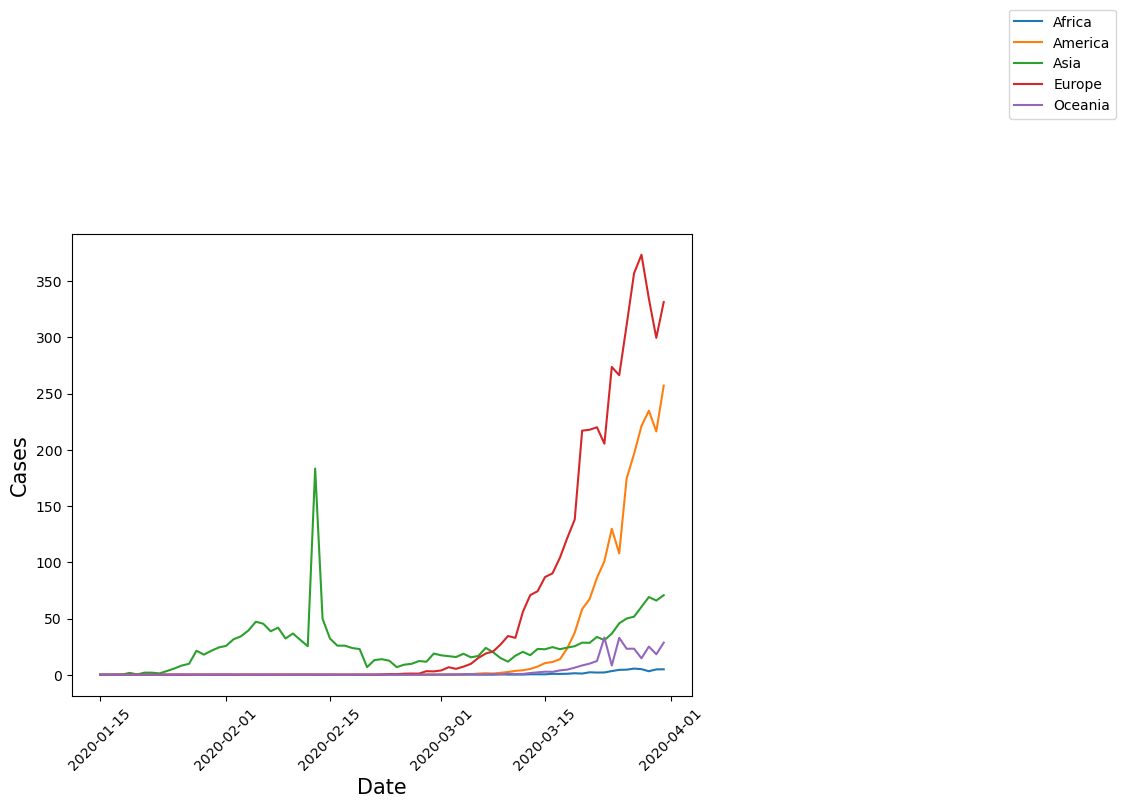

In [25]:
plt.figure(figsize=(8,6))
plt.plot(pivot1)
plt.legend(countries,loc="upper left",bbox_to_anchor=(1.5,1.5))
plt.xlabel('Date',fontsize=15)
plt.ylabel('Cases',fontsize=15)
plt.xticks(rotation=45)
plt.show()

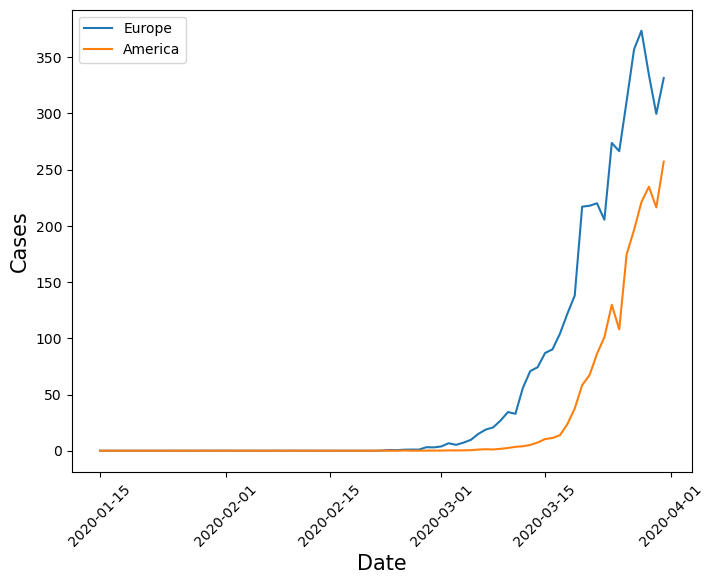

In [26]:
plt.figure(figsize=(8,6))
plt.plot(pivot1.Europe)
plt.plot(pivot1.America)
label=['Europe','America']
plt.legend(label,loc="upper left")
plt.xlabel('Date',fontsize=15)
plt.ylabel('Cases',fontsize=15)
plt.xticks(rotation=45)
plt.show()
#plt.plot(pivot1.index)

In [27]:
wcss=[]
for i in range(1,5):
    model_pivot = TimeSeriesKMeans(n_clusters=i, metric="dtw", max_iter=50, random_state=0)
    model_pivot.fit_predict(pivot1)
    wcss.append(model_pivot.inertia_)

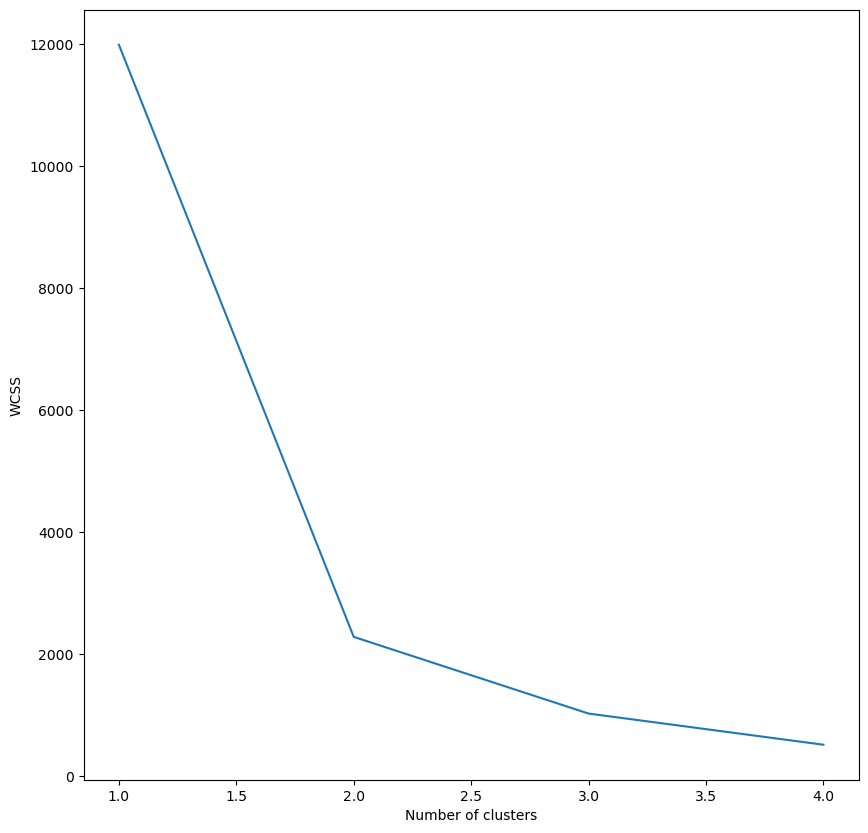

In [28]:
plt.figure(figsize=(10,10))
plt.plot(range(1,5),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [29]:
TSkmeans = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=50, random_state=0)
cases_pivot=TSkmeans.fit_predict(pivot1)
    
#define the silhouette score
silhouette_score(pivot1,cases_pivot,metric="dtw")

0.7857299553699775

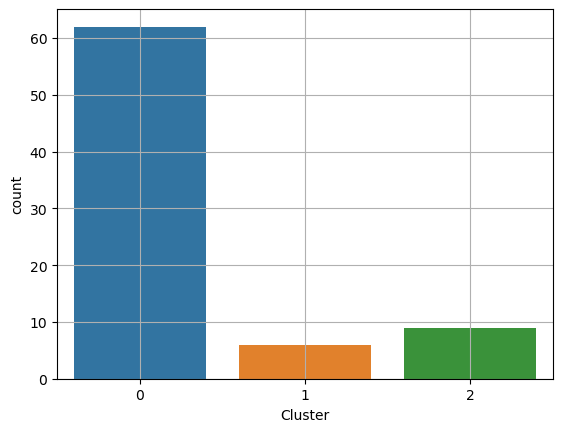

In [30]:
sns.countplot(x=cases_pivot)
plt.xlabel("Cluster")
plt.grid()
plt.show()

In [31]:
pca=PCA()
data_array=pca.fit_transform(pivot1)
data_array.shape

(77, 5)

In [32]:
pca.explained_variance_

array([1.47508496e+04, 5.19879617e+02, 2.81428860e+02, 1.25106211e+01,
       1.01539556e-01])

In [33]:
pca.explained_variance_ratio_

array([9.47707507e-01, 3.34010467e-02, 1.80811446e-02, 8.03778076e-04,
       6.52367846e-06])

In [34]:
pca.explained_variance_ratio_.shape

(5,)

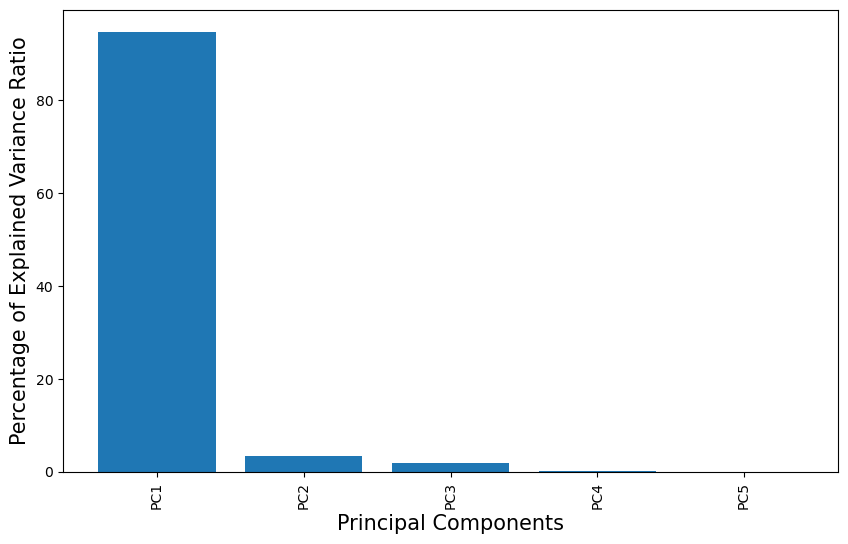

In [35]:
plt.figure(figsize=(10,6))

plt.bar(range(5),(pca.explained_variance_ratio_)*100,tick_label=['PC'+str(x+1) for x in range(0,5)])
plt.xlabel('Principal Components',size=15)
plt.ylabel("Percentage of Explained Variance Ratio",size=15)
plt.xticks(rotation=90)
plt.show()

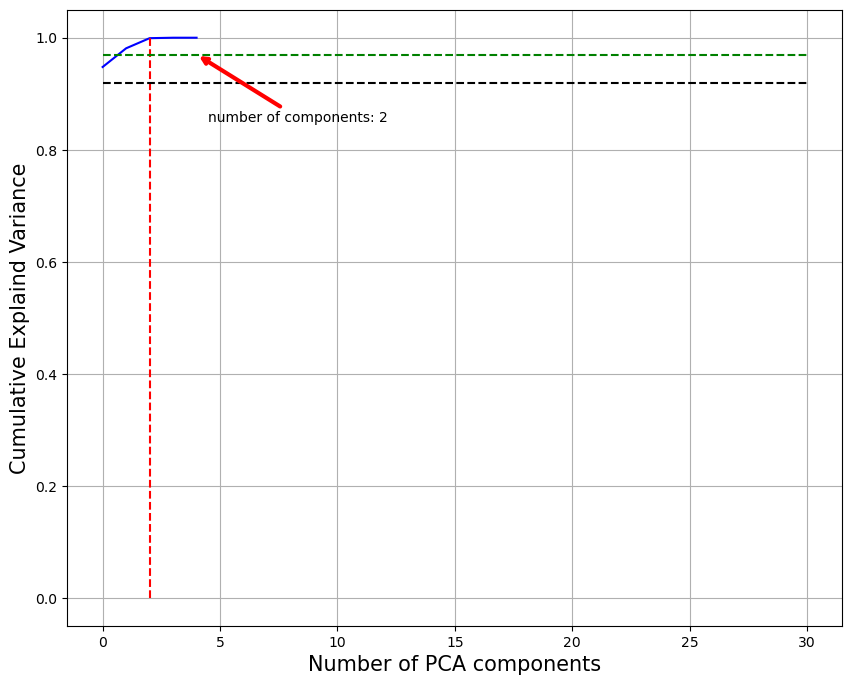

In [36]:
fig=plt.figure(figsize=(10,8))

plt.plot(np.cumsum(pca.explained_variance_ratio_),color='blue')
plt.vlines(x=2,ymax=1,ymin=0,colors='red',linestyles='--')
plt.hlines(y=0.92,xmax=30,xmin=0,colors='black',linestyles='--')
plt.hlines(y=0.97,xmax=30,xmin=0,colors='green',linestyles='--')
plt.xlabel('Number of PCA components',fontsize=15)
plt.ylabel('Cumulative Explaind Variance',fontsize=15)
plt.grid()
plt.annotate('number of components: 2',
            xy=(4,0.97),
            xytext=(4.5,0.85),
            arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='red',lw=3))
plt.show()

In [37]:
pca=PCA(2)
data_array=pca.fit_transform(pivot1)
data_array.shape

(77, 2)

In [38]:
model_pivot = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=50, random_state=0)

In [39]:
cases_pivot = model_pivot.fit_predict(data_array)
cases_pivot

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1])

In [40]:
TSkmeans = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=50, random_state=0)
cases_pivot=TSkmeans.fit_predict(data_array)
    
#define the silhouette score
silhouette_score(data_array,cases_pivot,metric="dtw")

0.7889292294097024

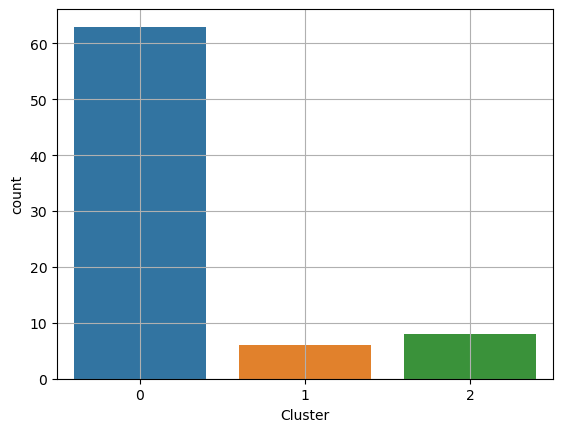

In [41]:
sns.countplot(x=cases_pivot)
plt.xlabel("Cluster")
plt.grid()
plt.show()

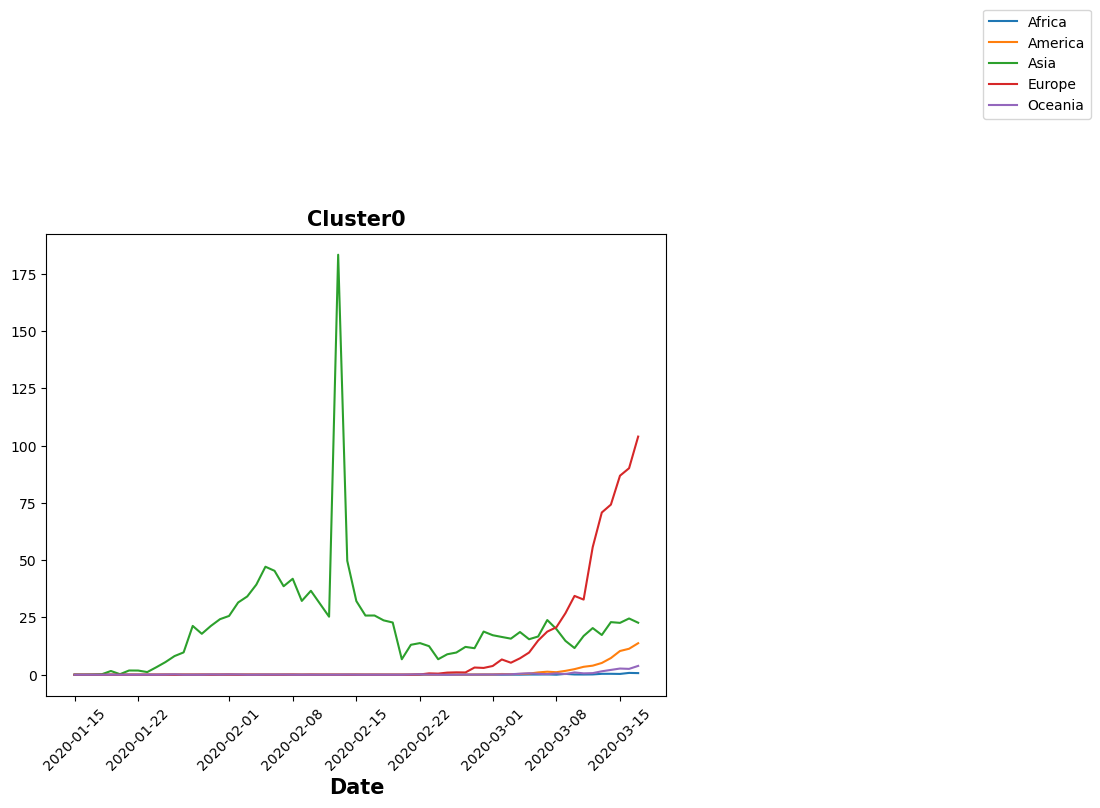

In [42]:
#Cluster 0
plt.figure(figsize=(8,6))
plt.plot(pivot1[cases_pivot==0])
plt.xlabel("Date",fontsize=15,fontweight='bold')
plt.title("Cluster0",fontsize=15,fontweight='bold')
plt.legend(countries,loc='best')
plt.legend(countries,loc="upper left",bbox_to_anchor=(1.5,1.5))
plt.xticks(rotation=45)
plt.show()

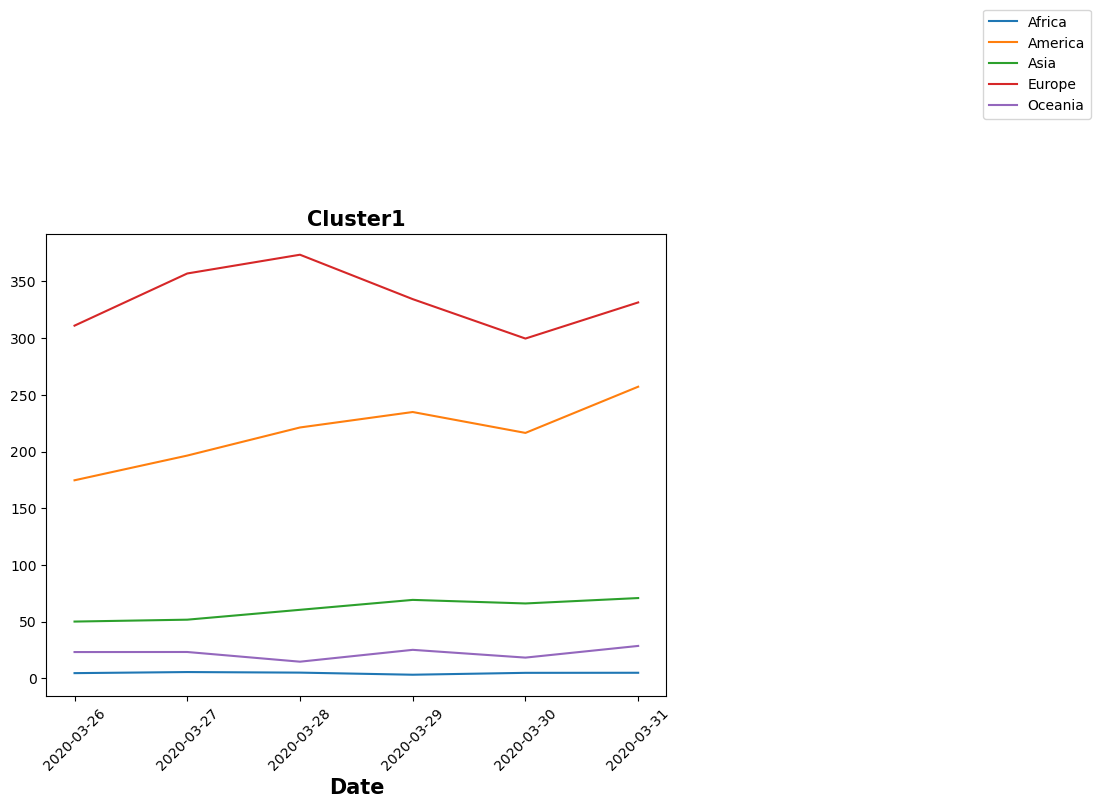

In [43]:
#Cluster 1
plt.figure(figsize=(8,6))
plt.plot(pivot1[cases_pivot==1])
plt.xlabel("Date",fontsize=15,fontweight='bold')
plt.title("Cluster1",fontsize=15,fontweight='bold')
plt.legend(countries,loc='best')
plt.legend(countries,loc="upper left",bbox_to_anchor=(1.5,1.5))
plt.xticks(rotation=45)
plt.show()

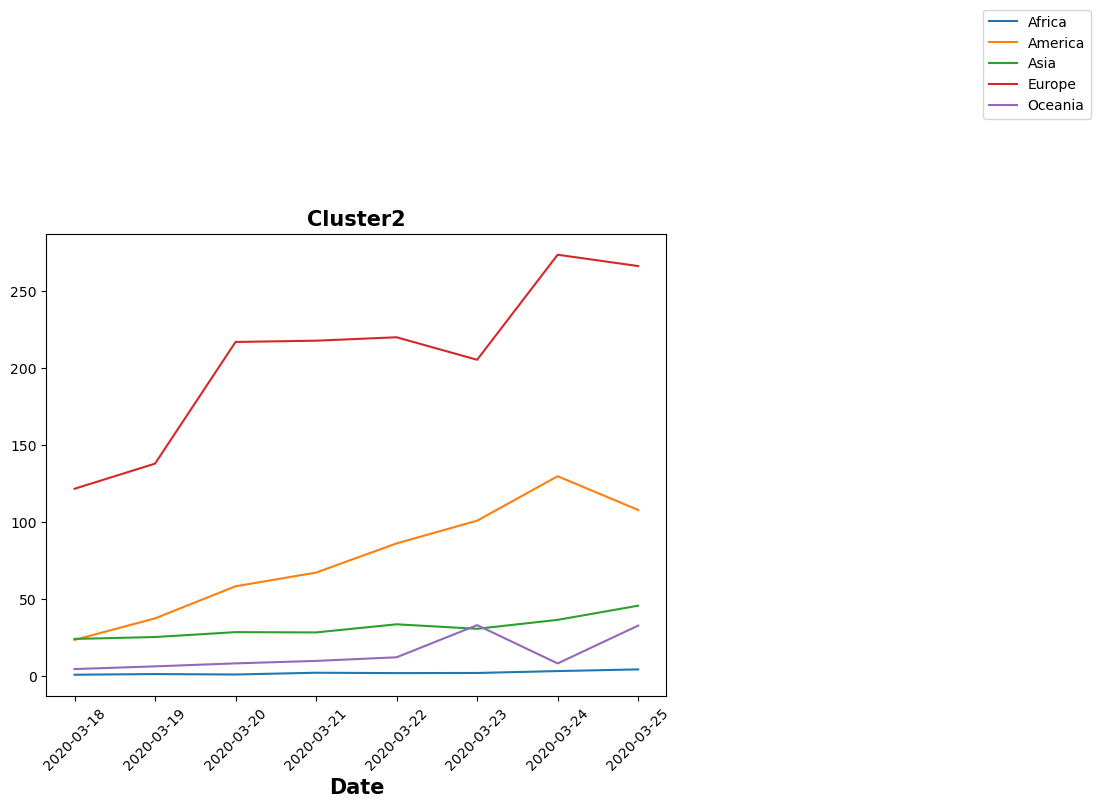

In [44]:
#Cluster 2
plt.figure(figsize=(8,6))
plt.plot(pivot1[cases_pivot==2])
plt.xlabel("Date",fontsize=15,fontweight='bold')
plt.title("Cluster2",fontsize=15,fontweight='bold')
plt.legend(countries,loc='best')
plt.legend(countries,loc="upper left",bbox_to_anchor=(1.5,1.5))
plt.xticks(rotation=45)
plt.show()

In [45]:
pivot1[cases_pivot==0]

continent,Africa,America,Asia,Europe,Oceania
date,,,,,
2020-01-15,0.000000,0.000000,0.023810,0.000000,0.00
2020-01-16,0.000000,0.000000,0.000000,0.000000,0.00
2020-01-17,0.000000,0.000000,0.059524,0.000000,0.00
2020-01-18,0.000000,0.000000,0.202381,0.000000,0.00
2020-01-19,0.000000,0.000000,1.630952,0.000000,0.00
...,...,...,...,...,...
2020-03-13,0.390909,5.132653,17.345238,70.827273,1.50
2020-03-14,0.400000,7.275510,22.964286,74.272727,2.10
2020-03-15,0.345455,10.357143,22.642857,86.890909,2.70


In [46]:
pivot1[cases_pivot==1]

continent,Africa,America,Asia,Europe,Oceania
date,,,,,
2020-03-26,4.500000,174.612245,49.988095,311.018182,23.10
2020-03-27,5.454545,196.408163,51.654762,357.027273,23.15
2020-03-28,4.954545,221.193878,60.357143,373.572727,14.60
2020-03-29,3.100000,234.826531,69.107143,334.400000,25.05
2020-03-30,4.763636,216.397959,65.964286,299.627273,18.20
2020-03-31,4.827273,257.142857,70.726190,331.490909,28.50


In [47]:
pivot1[cases_pivot==2]

continent,Africa,America,Asia,Europe,Oceania
date,,,,,
2020-03-18,0.872727,23.510204,24.130952,121.681818,4.55
2020-03-19,1.300000,37.489796,25.369048,138.027273,6.30
2020-03-20,1.018182,58.346939,28.547619,217.072727,8.25
2020-03-21,2.163636,67.244898,28.357143,217.890909,9.85
2020-03-22,1.927273,86.204082,33.630952,220.118182,12.20
2020-03-23,2.018182,100.959184,30.714286,205.481818,33.10
2020-03-24,3.245455,129.826531,36.523810,273.745455,8.20
2020-03-25,4.336364,107.908163,45.726190,266.381818,32.80


In [48]:
covid = data[data['date']== '2020-03-19']
covid

,country,country_code,continent,population,indicator,daily_count,date,rate_14_day,source
77,Afghanistan,AFG,Asia,38928341,confirmed cases,0,2020-03-19,0.053945,"Epidemic intelligence, national daily data"
375,Afghanistan,AFG,Asia,38928341,deaths,0,2020-03-19,0.000000,"Epidemic intelligence, national daily data"
1269,Albania,ALB,Europe,2862427,confirmed cases,4,2020-03-19,2.061188,"Epidemic intelligence, national daily data"
1567,Albania,ALB,Europe,2862427,deaths,1,2020-03-19,0.698708,"Epidemic intelligence, national daily data"
1865,Algeria,DZA,Africa,43851043,confirmed cases,12,2020-03-19,0.136827,"Epidemic intelligence, national daily data"
...,...,...,...,...,...,...,...,...,...
127857,Yemen,YEM,Asia,29825968,deaths,0,2020-03-19,0.000000,"Epidemic intelligence, national daily data"
128155,Zambia,ZMB,Africa,18383956,confirmed cases,2,2020-03-19,0.010879,"Epidemic intelligence, national daily data"
128453,Zambia,ZMB,Africa,18383956,deaths,0,2020-03-19,0.000000,"Epidemic intelligence, national daily data"
128751,Zimbabwe,ZWE,Africa,14862927,confirmed cases,0,2020-03-19,0.000000,"Epidemic intelligence, national daily data"


In [49]:
covid_data = covid[['daily_count']]
covid_data

,daily_count
77,0
375,0
1269,4
1567,1
1865,12
...,...
127857,0
128155,2
128453,0
128751,0


In [50]:
continent = covid['continent'].tolist()
print(continent)

['Asia', 'Asia', 'Europe', 'Europe', 'Africa', 'Africa', 'Europe', 'Europe', 'Africa', 'Africa', 'America', 'America', 'America', 'America', 'America', 'America', 'Europe', 'Europe', 'America', 'America', 'Oceania', 'Oceania', 'Europe', 'Europe', 'Europe', 'Europe', 'America', 'America', 'Asia', 'Asia', 'Asia', 'Asia', 'America', 'America', 'Europe', 'Europe', 'Europe', 'Europe', 'America', 'America', 'Africa', 'Africa', 'America', 'America', 'Asia', 'Asia', 'America', 'America', 'America', 'America', 'Europe', 'Europe', 'Africa', 'Africa', 'America', 'America', 'America', 'America', 'Asia', 'Asia', 'Europe', 'Europe', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Asia', 'Asia', 'Africa', 'Africa', 'America', 'America', 'America', 'America', 'Africa', 'Africa', 'Africa', 'Africa', 'America', 'America', 'Asia', 'Asia', 'America', 'America', 'Africa', 'Africa', 'Africa', 'Africa', 'America', 'America', 'Africa', 'Africa', 'Europe', 'Europe', 'America', 'America', 'America'

In [51]:
count = covid['continent'].count()
unique_continents = covid['continent'].unique()
print(unique_continents)
print(count)


['Asia' 'Europe' 'Africa' 'America' 'Oceania']
422


In [52]:
# Susceptible equation
def fa(N, a, b, beta):
    fa = -beta*a*b
    return fa

# Infected equation
def fb(N, a, b, beta, gamma):
    fb = beta*a*b - gamma*b
    return fb

# Recovered/deceased equation
def fc(N, b, gamma):
    fc = gamma*b
    return fc

In [53]:
# Runge-Kutta method of 4rth order for 3 dimensions (susceptible a, infected b and recovered r)
def rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs):
    a1 = fa(N, a, b, beta)*hs
    b1 = fb(N, a, b, beta, gamma)*hs
    c1 = fc(N, b, gamma)*hs
    ak = a + a1*0.5
    bk = b + b1*0.5
    ck = c + c1*0.5
    a2 = fa(N, ak, bk, beta)*hs
    b2 = fb(N, ak, bk, beta, gamma)*hs
    c2 = fc(N, bk, gamma)*hs
    ak = a + a2*0.5
    bk = b + b2*0.5
    ck = c + c2*0.5
    a3 = fa(N, ak, bk, beta)*hs
    b3 = fb(N, ak, bk, beta, gamma)*hs
    c3 = fc(N, bk, gamma)*hs
    ak = a + a3
    bk = b + b3
    ck = c + c3
    a4 = fa(N, ak, bk, beta)*hs
    b4 = fb(N, ak, bk, beta, gamma)*hs
    c4 = fc(N, bk, gamma)*hs
    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    return a, b, c

In [54]:
def SIR(N, b0, beta, gamma, hs):
    
    """
    N = total number of population
    beta = transition rate S->I
    gamma = transition rate I->R
    k =  denotes the constant degree distribution of the network (average value for networks in which 
    the probability of finding a node with a different connectivity decays exponentially fast
    hs = jump step of the numerical integration
    """
    
    # Initial condition
    a = float(N-1)/N -b0
    b = float(1)/N +b0
    c = 0.

    sus, inf, rec= [],[],[]
    for i in range(10000): # Run for a certain number of time-steps
        sus.append(a)
        inf.append(b)
        rec.append(c)
        a,b,c = rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs)

    return sus, inf, rec

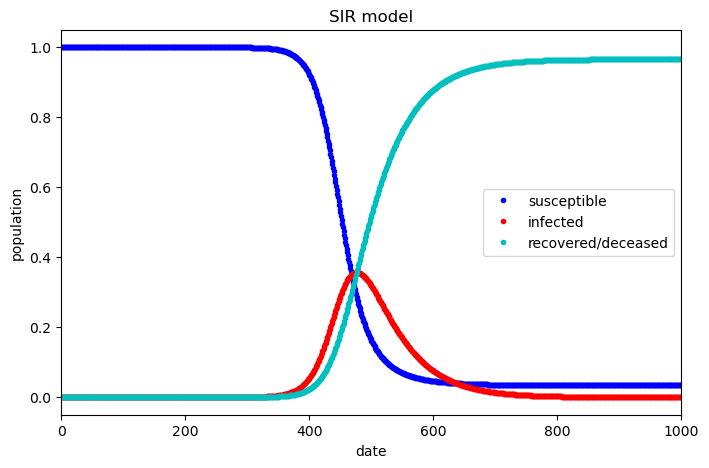

In [55]:
import matplotlib.pyplot as plt
# Parameters of the model
N = 7800*(10**6)
b0 = 0
beta = 0.7
gamma = 0.2
hs = 0.1

sus, inf, rec = SIR(N, b0, beta, gamma, hs)

f = plt.figure(figsize=(8,5)) 
plt.plot(sus, 'b.', label='susceptible');
plt.plot(inf, 'r.', label='infected');
plt.plot(rec, 'c.', label='recovered/deceased');
plt.title("SIR model")
plt.xlabel("date", fontsize=10);
plt.ylabel("population", fontsize=10);
plt.legend(loc='best')
plt.xlim(0,1000)
plt.savefig('SIR_example.png')
plt.show()

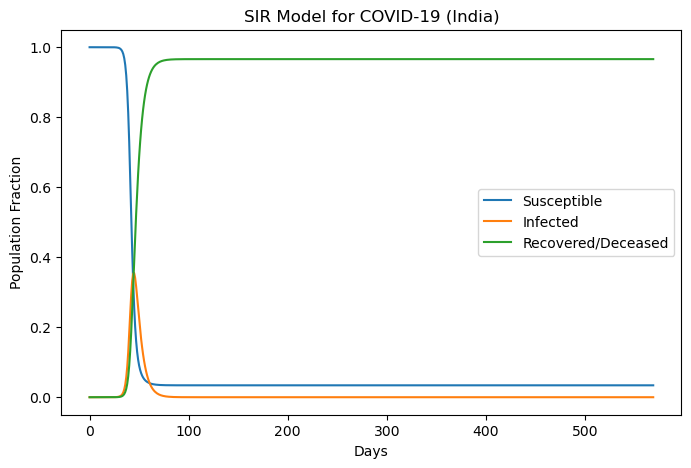

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Assuming 'data' is your DataFrame containing COVID-19 data
country_data = data[data['country'] == 'India']

# SIR model function
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Initial conditions
S0 = float(N - 1) / N  # Initial susceptible population
I0 = 1.0 / N  # Initial infected cases
R0 = 0.0  # Initial recovered cases

# Parameters of the model
beta = 0.7
gamma = 0.2

# Time vector (assuming your data is daily)
t = np.arange(0, len(country_data), 1)

# ODE solver
y0 = [S0, I0, R0]
result = odeint(sir_model, y0, t, args=(beta, gamma))
S, I, R = result.T

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered/Deceased')
plt.title('SIR Model for COVID-19 (India)')
plt.xlabel('Days')
plt.ylabel('Population Fraction')
plt.legend()
plt.show()


Linear Regression - Mean Squared Error: 23259198.09
Linear Regression - R-squared: 0.97
Elastic Net - Mean Squared Error: 111804699.56
Elastic Net - R-squared: 0.86
Decision Tree Regression - Mean Squared Error: 28208416.39
Decision Tree Regression - R-squared: 0.96
Support Vector Regression - Mean Squared Error: 1027841747.55
Support Vector Regression - R-squared: -0.29


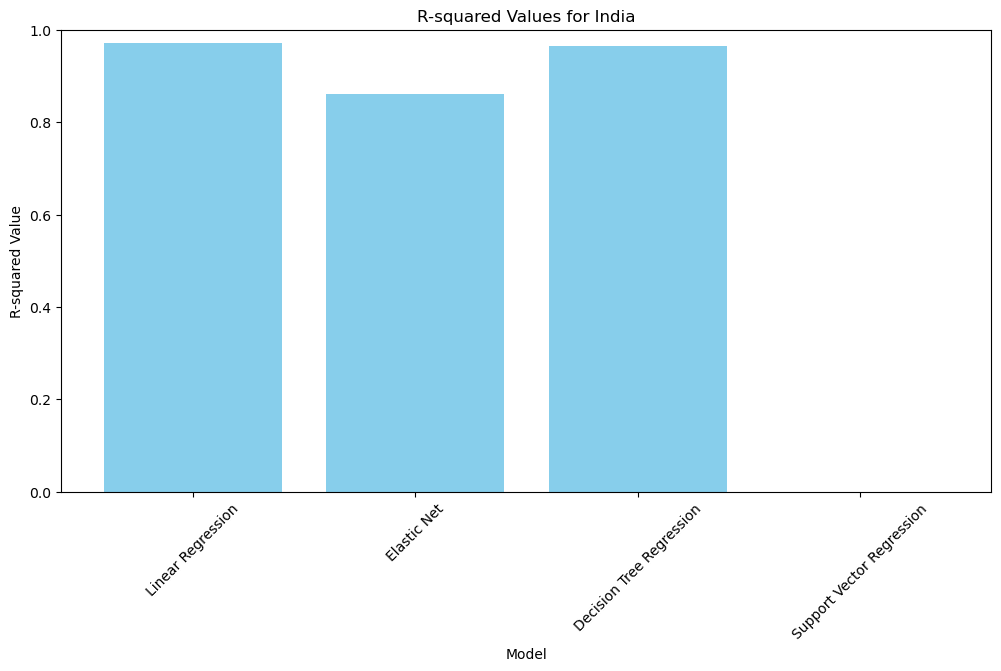

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


feature_columns = ['population', 'rate_14_day']  # Replace with relevant features
target_column = 'daily_count'  # Replace with your target variable

# Select data for Indonesia
df_indonesia = data[data['country'] == 'India']

X = df_indonesia[feature_columns]
y = df_indonesia[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipelines for different models
models = {
    'Linear Regression': Pipeline([('scaler', StandardScaler()), ('regressor', LinearRegression())]),
    'Elastic Net': Pipeline([('scaler', StandardScaler()), ('regressor', ElasticNet())]),
    'Decision Tree Regression': Pipeline([('scaler', StandardScaler()), ('regressor', DecisionTreeRegressor())]),
    'Support Vector Regression': Pipeline([('scaler', StandardScaler()), ('regressor', SVR())]),
}

# Train and evaluate each model
r_squared_values = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r_squared_values[model_name] = r2
    print(f'{model_name} - Mean Squared Error: {mse:.2f}')
    print(f'{model_name} - R-squared: {r2:.2f}')

# Plotting the R-squared values
plt.figure(figsize=(12, 6))
plt.bar(range(len(r_squared_values)), list(r_squared_values.values()), color='skyblue')
plt.xlabel('Model')
plt.ylabel('R-squared Value')
plt.title('R-squared Values for India')
plt.xticks(range(len(r_squared_values)), list(r_squared_values.keys()), rotation=45)
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1
plt.show()


Linear Regression - Mean Squared Error: 133774.22
Linear Regression - R-squared: 0.92
Elastic Net - Mean Squared Error: 312451.50
Elastic Net - R-squared: 0.81
Decision Tree Regression - Mean Squared Error: 154925.64
Decision Tree Regression - R-squared: 0.91
Support Vector Regression - Mean Squared Error: 2079462.75
Support Vector Regression - R-squared: -0.25


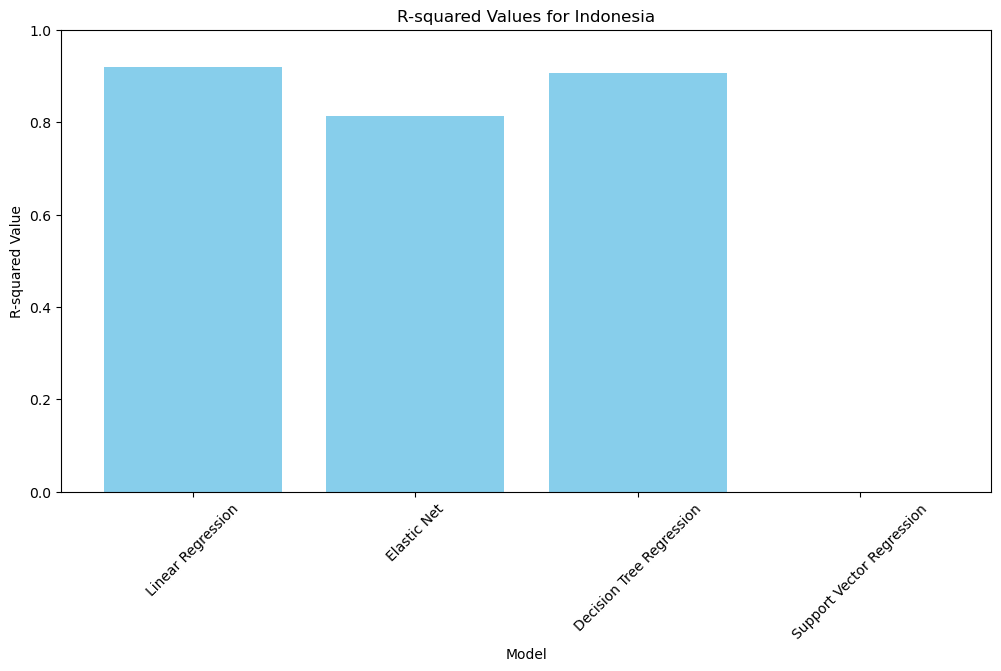

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


feature_columns = ['population', 'rate_14_day'] 
target_column = 'daily_count' 

# Select data for Indonesia
df_indonesia = data[data['country'] == 'Indonesia']

X = df_indonesia[feature_columns]
y = df_indonesia[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipelines for different models
models = {
    'Linear Regression': Pipeline([('scaler', StandardScaler()), ('regressor', LinearRegression())]),
    'Elastic Net': Pipeline([('scaler', StandardScaler()), ('regressor', ElasticNet())]),
    'Decision Tree Regression': Pipeline([('scaler', StandardScaler()), ('regressor', DecisionTreeRegressor())]),
    'Support Vector Regression': Pipeline([('scaler', StandardScaler()), ('regressor', SVR())]),
}

# Train and evaluate each model
r_squared_values = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r_squared_values[model_name] = r2
    print(f'{model_name} - Mean Squared Error: {mse:.2f}')
    print(f'{model_name} - R-squared: {r2:.2f}')

# Plotting the R-squared values
plt.figure(figsize=(12, 6))
plt.bar(range(len(r_squared_values)), list(r_squared_values.values()), color='skyblue')
plt.xlabel('Model')
plt.ylabel('R-squared Value')
plt.title('R-squared Values for Indonesia')
plt.xticks(range(len(r_squared_values)), list(r_squared_values.keys()), rotation=45)
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1
plt.show()


Linear Regression - Mean Squared Error: 8232.68
Linear Regression - R-squared: 0.93
Elastic Net - Mean Squared Error: 21191.91
Elastic Net - R-squared: 0.81
Decision Tree Regression - Mean Squared Error: 9140.28
Decision Tree Regression - R-squared: 0.92
Support Vector Regression - Mean Squared Error: 116195.05
Support Vector Regression - R-squared: -0.02


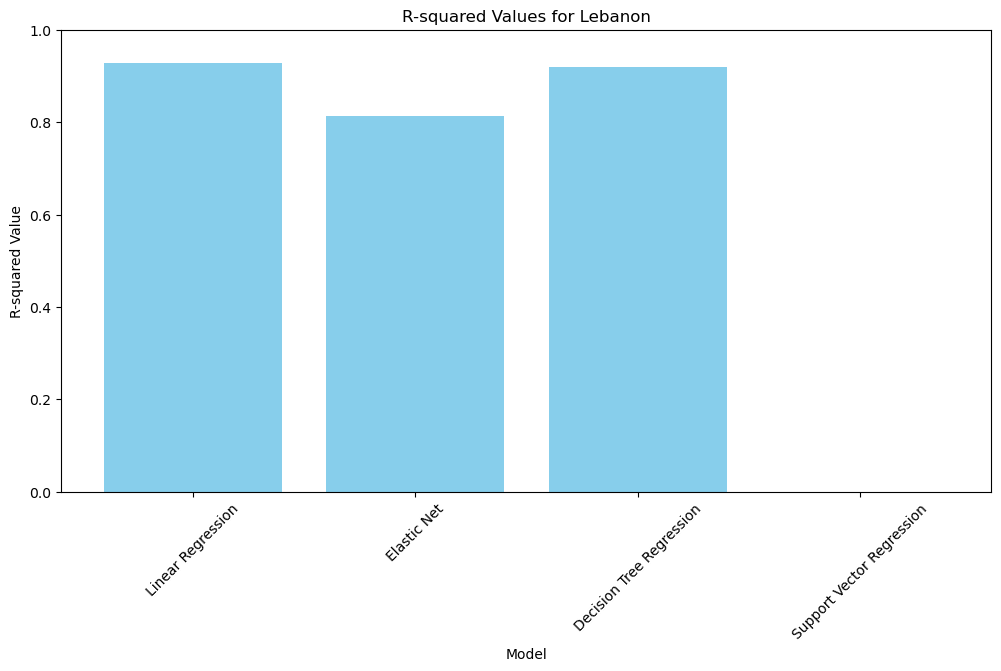

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


feature_columns = ['population', 'rate_14_day']  # Replace with relevant features
target_column = 'daily_count'  # Replace with your target variable

# Select data for Indonesia
df_indonesia = data[data['country'] == 'Lebanon']

X = df_indonesia[feature_columns]
y = df_indonesia[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipelines for different models
models = {
    'Linear Regression': Pipeline([('scaler', StandardScaler()), ('regressor', LinearRegression())]),
    'Elastic Net': Pipeline([('scaler', StandardScaler()), ('regressor', ElasticNet())]),
    'Decision Tree Regression': Pipeline([('scaler', StandardScaler()), ('regressor', DecisionTreeRegressor())]),
    'Support Vector Regression': Pipeline([('scaler', StandardScaler()), ('regressor', SVR())]),
}

# Train and evaluate each model
r_squared_values = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r_squared_values[model_name] = r2
    print(f'{model_name} - Mean Squared Error: {mse:.2f}')
    print(f'{model_name} - R-squared: {r2:.2f}')

# Plotting the R-squared values
plt.figure(figsize=(12, 6))
plt.bar(range(len(r_squared_values)), list(r_squared_values.values()), color='skyblue')
plt.xlabel('Model')
plt.ylabel('R-squared Value')
plt.title('R-squared Values for Lebanon')
plt.xticks(range(len(r_squared_values)), list(r_squared_values.keys()), rotation=45)
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1
plt.show()


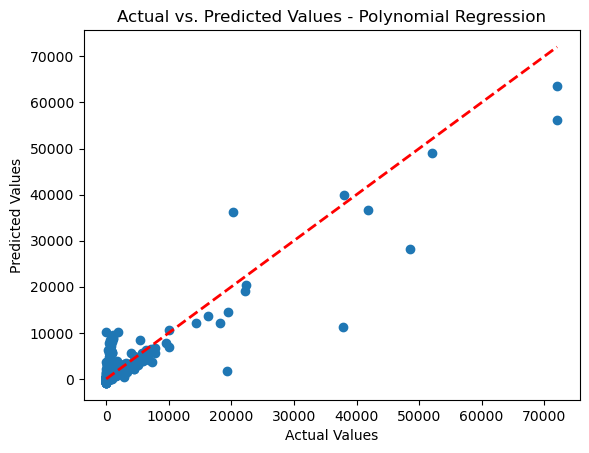

In [60]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Sample a smaller subset of the data
df_subset = data.sample(frac=0.1, random_state=42)

# Convert 'daily_count' column to numeric, errors='coerce' will replace non-numeric values with NaN
df_subset['daily_count'] = pd.to_numeric(df_subset['daily_count'], errors='coerce')

# Drop rows with NaN values in the 'daily_count' column
df_subset = df_subset.dropna(subset=['daily_count'])

# Exclude non-numeric columns
X_subset = df_subset.select_dtypes(include=['number'])

# Separate features (X) and target variable (y)
X_subset = X_subset.drop(columns=['daily_count'])
y_subset = df_subset['daily_count']

# Split the data into training and testing sets
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

# Feature scaling (if needed)
scaler = StandardScaler()
X_train_scaled_subset = scaler.fit_transform(X_train_subset)
X_test_scaled_subset = scaler.transform(X_test_subset)

# Feature selection: Select top k features using ANOVA F-statistic
k_best = 'all'  # Use 'all' to select all features, or set to a specific number based on your preference
selector = SelectKBest(f_classif, k=k_best)
X_train_selected_subset = selector.fit_transform(X_train_scaled_subset, y_train_subset)
X_test_selected_subset = selector.transform(X_test_scaled_subset)

# Build a machine learning model (Random Forest classifier in this example)
model_classifier = RandomForestClassifier(random_state=42)
model_classifier.fit(X_train_selected_subset, y_train_subset)

# Make predictions on the test set
y_pred_classifier_subset = model_classifier.predict(X_test_selected_subset)

# Create a pipeline with preprocessing, polynomial features, and Ridge regression
model_regression = make_pipeline(
    PolynomialFeatures(degree=2),  # You can adjust the degree as needed
    Ridge(alpha=1.0)  # You can adjust the alpha parameter for Ridge regression
)

# Train the model
model_regression.fit(X_train_selected_subset, y_train_subset)

# Make predictions on the test set
y_pred_regression_subset = model_regression.predict(X_test_selected_subset)

# Plotting actual vs. predicted values
plt.scatter(y_test_subset, y_pred_regression_subset)
plt.plot([min(y_test_subset), max(y_test_subset)], [min(y_test_subset), max(y_test_subset)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values - Polynomial Regression')
plt.show()


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np


feature_columns = ['population', 'rate_14_day']  # Replace with relevant features
target_column = 'daily_count'  # Replace with your target variable

# List of countries
countries = ['India', 'Indonesia', 'Lebanon']

# Dictionary to store results for each country
results_dict = {}

for country in countries:
    # Select data for the country
    df_country = data[data['country'] == country]

    X = df_country[feature_columns]
    y = df_country[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create pipelines for different models
    models = {
        'Linear Regression': Pipeline([('scaler', StandardScaler()), ('regressor', LinearRegression())]),
        'Elastic Net': Pipeline([('scaler', StandardScaler()), ('regressor', ElasticNet())]),
        'Decision Tree Regression': Pipeline([('scaler', StandardScaler()), ('regressor', DecisionTreeRegressor())]),
        'Support Vector Regression': Pipeline([('scaler', StandardScaler()), ('regressor', SVR())]),
    }

    # Dictionary to store results for each model
    country_results = {'Country': country}

    # Train and evaluate each model
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        country_results[f'{model_name} - Mean Squared Error'] = mse
        country_results[f'{model_name} - R-squared'] = r2

    # Store results for the country
    results_dict[country] = country_results

# Create a summary table using Pandas
summary_df = pd.DataFrame(results_dict.values())

# Display individual country results
for country, country_results in results_dict.items():
    results_list = [(key, value) for key, value in country_results.items()]
    print(f"Results for {country}:")
    print(tabulate(results_list, headers=['Metric', 'Value'], tablefmt='grid'))
    print("\n" + "=" * 50 + "\n")  # Separator between countries

# Calculate overall averages
overall_mse_avg = {}
overall_r2_avg = {}

for country_results in results_dict.values():
    for metric, value in country_results.items():
        if 'Mean Squared Error' in metric:
            overall_mse_avg.setdefault(metric, []).append(value)
        elif 'R-squared' in metric:
            overall_r2_avg.setdefault(metric, []).append(value)

# Calculate average values
for metric, values in overall_mse_avg.items():
    mse_avg = np.mean(values)
    r2_avg = np.mean(overall_r2_avg[metric.replace('Mean Squared Error', 'R-squared')])

    # Display the overall average results for each metric
    print(f"Overall Average Results for {metric}:")
    print(tabulate([['Mean Squared Error', mse_avg], ['R-squared', r2_avg]], headers=['Metric', 'Average'], tablefmt='grid'))
    print("\n" + "=" * 50 + "\n")  # Separator between metrics


Results for India:
+------------------------------------------------+---------------------+
| Metric                                         | Value               |
+================================================+=====================+
| Country                                        | India               |
+------------------------------------------------+---------------------+
| Linear Regression - Mean Squared Error         | 23259198.085343778  |
+------------------------------------------------+---------------------+
| Linear Regression - R-squared                  | 0.9709121639529994  |
+------------------------------------------------+---------------------+
| Elastic Net - Mean Squared Error               | 111804699.56001002  |
+------------------------------------------------+---------------------+
| Elastic Net - R-squared                        | 0.8601776055153423  |
+------------------------------------------------+---------------------+
| Decision Tree Regression - Mea